In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize': (10, 5)}, style="whitegrid")

•	timestamp – дата и время (точность до часа)  
•	cnt – количество аренд велосипедов за этот час  
•	t1 – температура, в С  
•	t2 – температура "ощущается как", в С   
•	hum – влажность (%)  
•	wind_speed – скорость ветра, км/ч  
•	weather_code – погодные условия:  
1 – ясно (SKC)  
2 – преимущественно ясно / встречаются отдельные облака (SCT)  
3 – облачно / значительные облака (BKN)  
4 – пасмурно (OVC)  
7 – небольшой дождь Rain/ light Rain shower/ Light rain   
10 – дождь с грозой  
26 – снегопад   
94 – ледяной туман (да, такое бывает!)  
•	isholiday – является ли день праздником (1 – праздник, 0 – нет)  
•	isweekend –  является ли день выходным (1 – выходной, 0 – нет)  
•	season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)

In [2]:
df = pd.read_csv('3_london.csv', encoding='utf-8')

In [6]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


1.	Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [5]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [16]:
df.describe()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,2016-01-03 22:31:00.571953664,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
min,2015-01-04 00:00:00,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2015-07-04 20:15:00,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,2016-01-03 15:30:00,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,2016-07-04 15:45:00,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,2017-01-03 23:00:00,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000
std,NaN,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911


2.	Постройте график по числу поездок по дате и времени, где:  
по оси х - дата (timestamp)  
по оси у - число поездок(cnt)

<Axes: xlabel='timestamp', ylabel='cnt'>

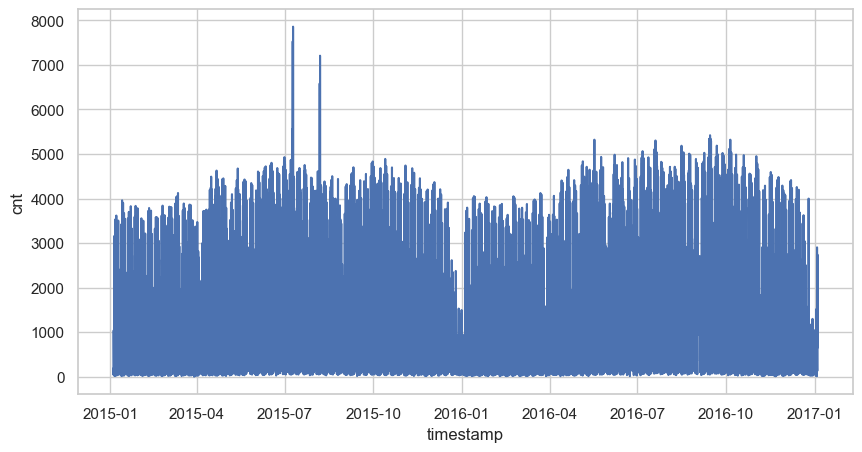

In [7]:
sns.lineplot(data=df, x='timestamp', y='cnt')

c:\Users\911\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='cnt', ylabel='Count'>

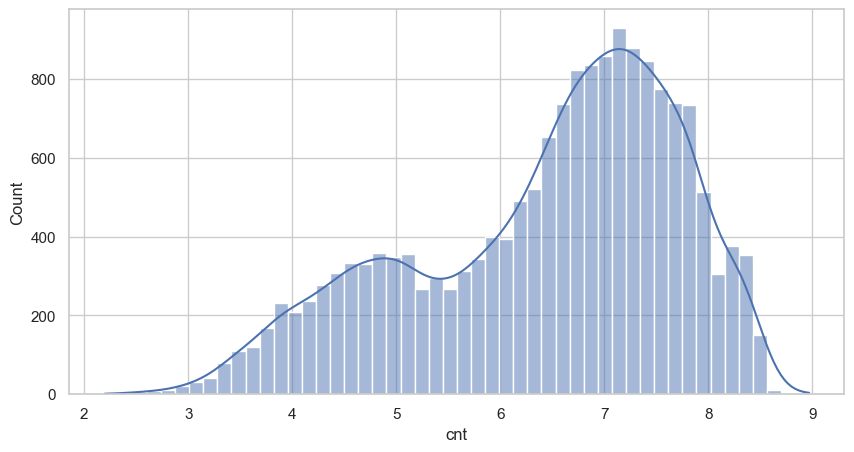

In [8]:
sns.histplot(np.log(df.groupby('timestamp').cnt.sum()), kde=True, bins=50)

In [20]:
# Коэффициент асимметрии (skewness)
# skew > 1 → сильная правосторонняя асимметрия → логарифмировать почти всегда полезно.
# 0.5 < skew ≤ 1 → умеренная асимметрия → логарифм может помочь.
# skew ≤ 0.5 → симметрия → логарифмировать нет смысла.
df['cnt'].skew()

np.float64(1.325706802078218)

In [21]:
# Коэффициент эксцесса (kurtosis)
# kurtosis > 3 → тяжелый хвост → логарифм полезен.
# kurtosis < 3 → хвост не тяжёлый → логарифмировать не надо.
df['cnt'].kurt()

np.float64(1.5446327360846879)

In [ ]:
# Разброс значений
# Если max/min отличается на два и более порядка (х10–х100–х1000), то логарифм обычно оправдан.
df['cnt'].max() / df['cnt'].min()

3.	Преобразуйте данные c помощью resample и посчитайте число поездок по дням. Визуализируйте агрегированный результат.

In [9]:
df.sort_values(by='timestamp', inplace=True)
df.set_index('timestamp', drop=False, inplace=True)

In [10]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<Axes: xlabel='timestamp'>

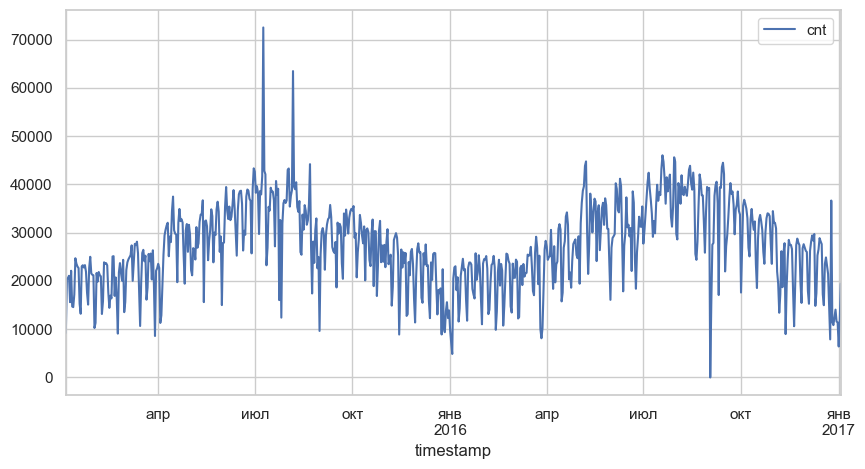

In [11]:
df.resample('D').agg({'cnt': 'sum'}).plot()

4. Выяснить, что происходило в те дни, когда наблюдаются скачки в графике:  
- посчитать скользящее среднее, что бы сделать ряд  
- посчитать разницу между наблюдаемым и сглаженным значением  
- определить верхние и нижние границы 99% доверительного интервала  
- установить причины аномалий  
На данном этапе возьмем агрегированные данные по дням с предыдущего шага и посчитаем скользящее среднее с окном 3. В качестве ответа укажем полученное число аренд за 2015-07-09, округлив значение до целого.

In [12]:
df_by_day = df.resample('D').cnt.sum().reset_index()
df_by_day

,timestamp,cnt
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
726,2016-12-30,11566
727,2016-12-31,11424
728,2017-01-01,6421
729,2017-01-02,11823


In [14]:
df_by_day_roll = df.resample('D').cnt.sum().rolling(window=3).mean().reset_index()
df_by_day_roll

,timestamp,cnt
0,2015-01-04,NaN
1,2015-01-05,NaN
2,2015-01-06,16739.666667
3,2015-01-07,20683.000000
4,2015-01-08,19092.666667
...,...,...
726,2016-12-30,12682.000000
727,2016-12-31,12347.333333
728,2017-01-01,9803.666667
729,2017-01-02,9889.333333


<Axes: >

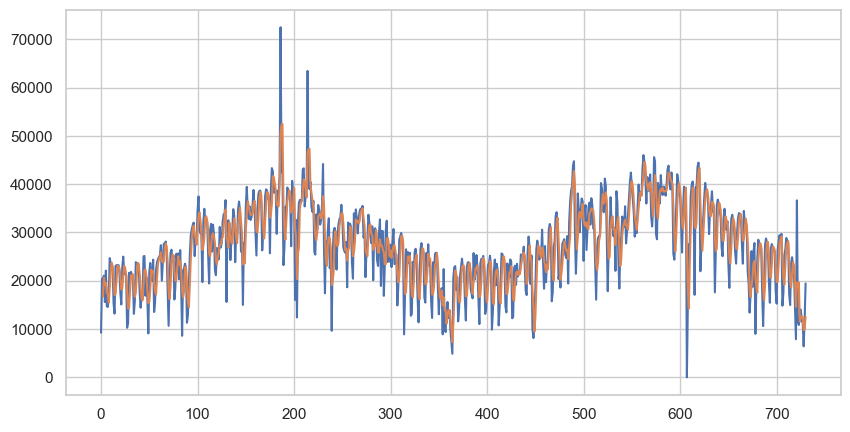

In [17]:
df_by_day.cnt.plot()
df_by_day_roll.cnt.plot()

In [18]:
df_by_day_roll.query("timestamp == '2015-07-09'")

C:\Users\911\AppData\Local\Temp\ipykernel_3576\3825446354.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_by_day_roll.query("timestamp == '2015-07-09'")


,timestamp,cnt
186,2015-07-09,50705.0


5. Посчитайте разницу между наблюдаемыми и подсчитанными значениями. Далее - примените ф-ию для подсчета стандартного отклонения, н.п.:  
c = a - b  
std = np.std(c)  

In [27]:
std = np.std(df_by_day['cnt'] - df_by_day_roll['cnt'])

Определим границы интервалов. Для этого нужно взять данные, полученные при расчете сользящего среднего, и создать следующие объекты:  
- upper_bound - верхняя граница (к скользящим средним прибавляем 2,576 * std)  
- lower_bound - нижняя граница (вычитаем 2,576 * std)  
Полученные значения записать в новые столбцы датайрейма с агрегированными данными.  
Чему равно значение верхней грацицы для последнего наблюдения?

In [30]:
upper_bound = df_by_day_roll['cnt'] + 2.576 * std
lower_bound = df_by_day_roll['cnt'] - 2.576 * std
df_by_day['upper_bound'] = upper_bound
df_by_day['lower_bound'] = lower_bound

In [32]:
df_by_day.sort_values(by='timestamp', ascending=False)['upper_bound'].head(1)

730    24302.919188
Name: upper_bound, dtype: float64

Изучим аномально высокие значения. Сначала выведем наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала.  
В какой день значение оказалось наибольшим?

In [35]:
df_by_day.query("cnt > upper_bound").sort_values(by='cnt', ascending=False)

,timestamp,cnt,upper_bound,lower_bound
186,2015-07-09,72504,62447.919188,38962.080812
214,2015-08-06,63468,58370.252521,34884.414146
721,2016-12-25,36653,31393.585854,7907.747479
609,2016-09-04,27512,26001.919188,2516.080812


Подумайте, в чем может быть причина столько высокого числа аренд в этот день. Для этого можете исследовать уже имеющиеся переменные в датасете, проверит наличие ошибок в данных (повторяющиеся строки), а также использовать поиск Google.